In [8]:
import pandas as pd

df= pd.read_csv("dataset_lemon.csv")
df

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
0,57.1,105,3.7,8.4,California,Puncak,Kuning cerah,Grade A
1,60.2,118,3.8,8.2,Malang,Puncak,Kuning cerah,Grade A
2,48.5,80,4.6,7.8,Medan,Akhir,Kuning kehijauan,Grade B
3,65.8,136,5.1,7.0,California,Akhir,Hijau pekat,Reject
4,55.9,101,3.5,8.5,Malang,Awal,Kuning cerah,Grade A
...,...,...,...,...,...,...,...,...
790,54.9,98,4.2,7.7,Medan,Akhir,Kuning kehijauan,Grade B
791,67.2,141,5.7,6.8,California,Akhir,Hijau pekat,Reject
792,57.0,105,3.5,8.4,Malang,Awal,Kuning cerah,Grade A
793,51.1,89,4.5,7.9,Medan,Puncak,Kuning kehijauan,Grade B


In [9]:
df.shape


(795, 8)

In [10]:
df.columns

Index(['diameter', 'berat', 'tebal_kulit', 'kadar_gula', 'asal_daerah',
       'musim_panen', 'warna', 'kualitas'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diameter     795 non-null    float64
 1   berat        795 non-null    int64  
 2   tebal_kulit  795 non-null    float64
 3   kadar_gula   795 non-null    float64
 4   asal_daerah  795 non-null    object 
 5   musim_panen  795 non-null    object 
 6   warna        795 non-null    object 
 7   kualitas     795 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.8+ KB


In [12]:
df.describe()

,diameter,berat,tebal_kulit,kadar_gula
count,795.000000,795.000000,795.000000,795.000000
mean,56.646918,105.427673,4.324906,7.772075
std,6.134574,19.890398,0.711215,0.514304
min,45.500000,70.000000,3.400000,6.700000
25%,51.600000,91.000000,3.800000,7.400000
50%,56.100000,103.000000,4.200000,7.900000
75%,61.300000,121.000000,4.600000,8.200000
max,68.500000,145.000000,6.000000,8.600000


In [13]:
df.sample(5, random_state=42)

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
691,45.7,71,6.0,6.7,Medan,Akhir,Hijau pekat,Reject
662,57.8,107,3.7,8.3,California,Awal,Kuning cerah,Grade A
63,57.8,107,3.7,8.3,California,Awal,Kuning cerah,Grade A
531,46.5,72,5.6,7.3,Malang,Akhir,Hijau pekat,Reject
66,64.5,134,4.9,7.2,Malang,Akhir,Hijau pekat,Reject


In [14]:
df["asal_daerah"].value_counts()

asal_daerah
California    265
Malang        265
Medan         265
Name: count, dtype: int64

In [15]:
df["warna"].value_counts()

warna
Kuning cerah        346
Kuning kehijauan    290
Hijau pekat         159
Name: count, dtype: int64

In [16]:
df["musim_panen"].value_counts()

musim_panen
Puncak    318
Akhir     239
Awal      238
Name: count, dtype: int64

In [17]:
df["kualitas"]

0      Grade A
1      Grade A
2      Grade B
3       Reject
4      Grade A
        ...   
790    Grade B
791     Reject
792    Grade A
793    Grade B
794    Grade A
Name: kualitas, Length: 795, dtype: object

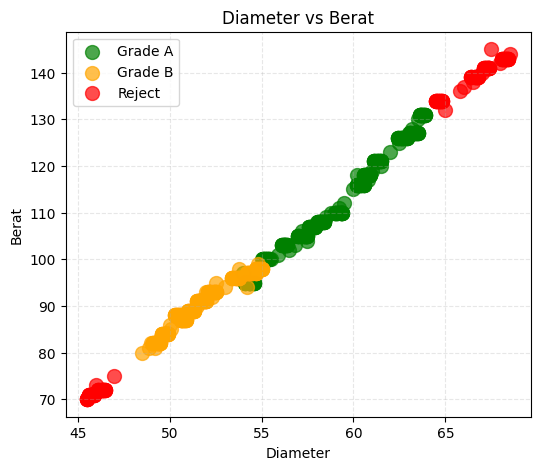

In [18]:
import matplotlib.pyplot as plt

gradeA = df[df["kualitas"] == "Grade A"]
gradeB = df[df["kualitas"] == "Grade B"]
reject = df[df["kualitas"] == "Reject"]

plt.figure(figsize=(6, 5))
plt.scatter(gradeA["diameter"], gradeA["berat"], s=100, alpha=0.7, color="green", label="Grade A")
plt.scatter(gradeB["diameter"], gradeB["berat"], s=100, alpha=0.7, color="orange", label="Grade B")
plt.scatter(reject["diameter"], reject["berat"], s=100, alpha=0.7, color="red", label="Reject")
plt.xlabel("Diameter")
plt.ylabel("Berat")
plt.title("Diameter vs Berat")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()




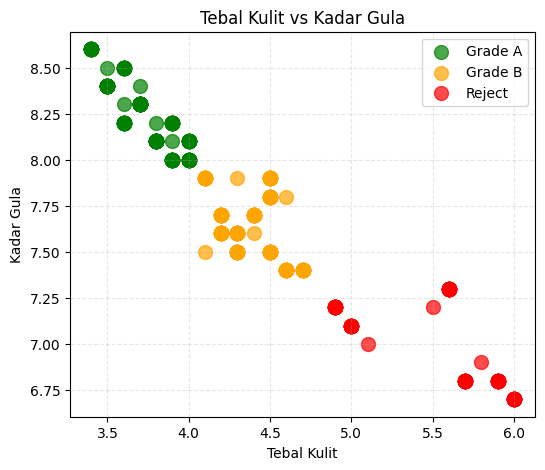

In [19]:
import matplotlib.pyplot as plt

gradeA = df[df["kualitas"] == "Grade A"]
gradeB = df[df["kualitas"] == "Grade B"]
reject = df[df["kualitas"] == "Reject"]

plt.figure(figsize=(6, 5))
plt.scatter(gradeA["tebal_kulit"], gradeA["kadar_gula"], s=100, alpha=0.7, color="green", label="Grade A")
plt.scatter(gradeB["tebal_kulit"], gradeB["kadar_gula"], s=100, alpha=0.7, color="orange", label="Grade B")
plt.scatter(reject["tebal_kulit"], reject["kadar_gula"], s=100, alpha=0.7, color="red", label="Reject")
plt.xlabel("Tebal Kulit")
plt.ylabel("Kadar Gula")
plt.title("Tebal Kulit vs Kadar Gula")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["diameter","berat","tebal_kulit","kadar_gula","asal_daerah","warna","musim_panen"]]
y = df["kualitas"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["diameter", "berat", "tebal_kulit", "kadar_gula"]
categorical_columns = ["asal_daerah","musim_panen"]
ordinal_columns = ["warna"]

warna_order = ["Hijau pekat", "Kuning kehijauan", "Kuning cerah"]
ordinal_order = [warna_order]

preprocessing=ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(), numeric_columns),
        ("ohe",OneHotEncoder(), categorical_columns),
        ("oe",OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LogisticRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
        
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("\nScores :\n", scores)
print("\nMean Scores :",scores.mean())
             

Accuracy : 1.0

Classification Report :
               precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00        71
     Grade B       1.00      1.00      1.00        53
      Reject       1.00      1.00      1.00        35

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159


Confusion Matrix :
 [[71  0  0]
 [ 0 53  0]
 [ 0  0 35]]

Scores :
 [1. 1. 1. 1. 1.]

Mean Scores : 1.0


In [21]:
data_baru = pd.DataFrame([[48.5,80, 4.6, 7.8, "Medan", "Kuning kehijauan", "Akhir"]],
                         columns=["diameter","berat","tebal_kulit","kadar_gula","asal_daerah","warna","musim_panen"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi Grade B dengan tingkat keyakinan 99.24%


In [22]:
import joblib

joblib.dump (model,"model_klasifikasi_lemon.joblib")

['model_klasifikasi_lemon.joblib']